In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torchvision
from torchvision import transforms
import os

import glob
from PIL import Image

In [6]:
torch.__version__

'1.7.1'

In [7]:
BATCH_SIZE = 8

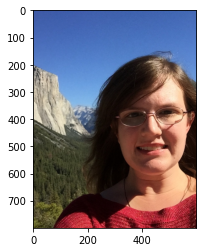

In [3]:
pil_img = Image.open(r'D:\ke\20201128\dataset\dataset\dataset\training\00001.png')
np_img = np.array(pil_img)
plt.imshow(np_img)
plt.show()

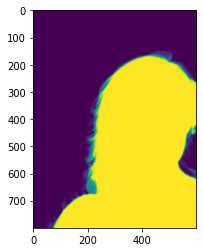

In [4]:
pil_img = Image.open(r'D:\ke\20201128\dataset\dataset\dataset\training\00001_matte.png')
np_img = np.array(pil_img)
plt.imshow(np_img)
plt.show()

In [5]:
np.unique(np_img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [6]:
np_img.max(), np_img.min()

(255, 0)

In [7]:
np_img.shape

(800, 600)

In [8]:
all_pics = glob.glob(r'D:\ke\20201128\dataset\dataset\dataset\training\*.png')

In [9]:
all_pics[:5]

['D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00001.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00001_matte.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00002.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00002_matte.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00003.png']

In [10]:
images = [p for p in all_pics if 'matte' not in p]

In [11]:
len(images)

1700

In [12]:
annotations = [p for p in all_pics if 'matte' in p]

In [13]:
len(annotations)

1700

In [14]:
images[:5]

['D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00001.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00002.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00003.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00004.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00005.png']

In [15]:
annotations[:5]

['D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00001_matte.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00002_matte.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00003_matte.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00004_matte.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00005_matte.png']

In [16]:
annotations[-5:]

['D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\01696_matte.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\01697_matte.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\01698_matte.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\01699_matte.png',
 'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\01700_matte.png']

In [17]:
np.random.seed(2021)
index = np.random.permutation(len(images))

In [18]:
images = np.array(images)[index]

In [19]:
images[:5]

array(['D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00372.png',
       'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\01290.png',
       'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00063.png',
       'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\01131.png',
       'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\01126.png'],
      dtype='<U57')

In [20]:
anno = np.array(annotations)[index]

In [21]:
anno[:5]

array(['D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00372_matte.png',
       'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\01290_matte.png',
       'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\00063_matte.png',
       'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\01131_matte.png',
       'D:\\ke\\20201128\\dataset\\dataset\\dataset\\training\\01126_matte.png'],
      dtype='<U63')

In [22]:
all_test_pics = glob.glob(r'D:\ke\20201128\dataset\dataset\dataset\testing\*.png')

In [23]:
test_images = [p for p in all_test_pics if 'matte' not in p]
test_anno = [p for p in all_test_pics if 'matte' in p]

In [24]:
transform = transforms.Compose([
                    transforms.Resize((256, 256)),
                    transforms.ToTensor(),
])

In [25]:
class Portrait_dataset(data.Dataset):
    def __init__(self, img_paths, anno_paths):
        self.imgs = img_paths
        self.annos = anno_paths
        
    def __getitem__(self, index):
        img = self.imgs[index]
        anno = self.annos[index]
        
        pil_img = Image.open(img)    
        img_tensor = transform(pil_img)
        
        pil_anno = Image.open(anno)    
        anno_tensor = transform(pil_anno)
        anno_tensor = torch.squeeze(anno_tensor).type(torch.long)
        anno_tensor[anno_tensor > 0] = 1
        
        return img_tensor, anno_tensor
    
    def __len__(self):
        return len(self.imgs)

In [26]:
train_dataset = Portrait_dataset(images, anno)

In [27]:
test_dataset = Portrait_dataset(test_images, test_anno)

In [28]:
train_dl = data.DataLoader(
                           train_dataset,
                           batch_size=BATCH_SIZE,
                           shuffle=True,
)

In [29]:
test_dl = data.DataLoader(
                          test_dataset,
                          batch_size=BATCH_SIZE,
)

In [30]:
imgs_batch, annos_batch = next(iter(train_dl))

In [31]:
img = imgs_batch[0].permute(1,2,0).numpy()
anno = annos_batch[0].numpy()

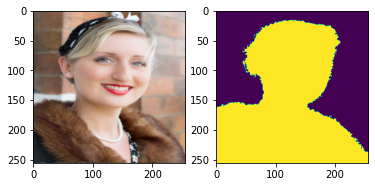

In [32]:
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(anno)

In [33]:
class Downsample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Downsample, self).__init__()
        self.conv_relu = nn.Sequential(
                            nn.Conv2d(in_channels, out_channels, 
                                      kernel_size=3, padding=1),
                            nn.ReLU(inplace=True),
                            nn.Conv2d(out_channels, out_channels, 
                                      kernel_size=3, padding=1),
                            nn.ReLU(inplace=True)
            )
        self.pool = nn.MaxPool2d(kernel_size=2)
    def forward(self, x, is_pool=True):
        if is_pool:
            x = self.pool(x)
        x = self.conv_relu(x)
        return x

In [34]:
class Upsample(nn.Module):
    def __init__(self, channels):
        super(Upsample, self).__init__()
        self.conv_relu = nn.Sequential(
                            nn.Conv2d(2*channels, channels, 
                                      kernel_size=3, padding=1),
                            nn.ReLU(inplace=True),
                            nn.Conv2d(channels, channels,  
                                      kernel_size=3, padding=1),
                            nn.ReLU(inplace=True)
            )
        self.upconv_relu = nn.Sequential(
                               nn.ConvTranspose2d(channels, 
                                                  channels//2, 
                                                  kernel_size=3,
                                                  stride=2,
                                                  padding=1,
                                                  output_padding=1),
                               nn.ReLU(inplace=True)
            )
        
    def forward(self, x):
        x = self.conv_relu(x)
        x = self.upconv_relu(x)
        return x

In [35]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.down1 = Downsample(3, 64)
        self.down2 = Downsample(64, 128)
        self.down3 = Downsample(128, 256)
        self.down4 = Downsample(256, 512)
        self.down5 = Downsample(512, 1024)
        
        self.up = nn.Sequential(
                               nn.ConvTranspose2d(1024, 
                                                  512, 
                                                  kernel_size=3,
                                                  stride=2,
                                                  padding=1,
                                                  output_padding=1),
                               nn.ReLU(inplace=True)
            )
        
        self.up1 = Upsample(512)
        self.up2 = Upsample(256)
        self.up3 = Upsample(128)
        
        self.conv_2 = Downsample(128, 64)
        self.last = nn.Conv2d(64, 2, kernel_size=1)

    def forward(self, x):
        x1 = self.down1(x, is_pool=False)
        x2 = self.down2(x1)
        x3 = self.down3(x2)
        x4 = self.down4(x3)
        x5 = self.down5(x4)
        
        x5 = self.up(x5)
        
        x5 = torch.cat([x4, x5], dim=1)           # 32*32*1024
        x5 = self.up1(x5)                         # 64*64*256)
        x5 = torch.cat([x3, x5], dim=1)           # 64*64*512  
        x5 = self.up2(x5)                         # 128*128*128
        x5 = torch.cat([x2, x5], dim=1)           # 128*128*256
        x5 = self.up3(x5)                         # 256*256*64
        x5 = torch.cat([x1, x5], dim=1)           # 256*256*128
        
        x5 = self.conv_2(x5, is_pool=False)       # 256*256*64
        
        x5 = self.last(x5)                        # 256*256*3
        return x5

In [36]:
model = Net()

In [37]:
if torch.cuda.is_available():
    model.to('cuda')

In [38]:
loss_fn = nn.CrossEntropyLoss()

In [39]:
from torch.optim import lr_scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [40]:
def fit(epoch, model, trainloader, testloader):
    correct = 0
    total = 0
    running_loss = 0
    
    model.train()
    for x, y in trainloader:
        if torch.cuda.is_available():
            x, y = x.to('cuda'), y.to('cuda')
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()
    exp_lr_scheduler.step()
    epoch_loss = running_loss / len(trainloader.dataset)
    epoch_acc = correct / (total*256*256)
        
        
    test_correct = 0
    test_total = 0
    test_running_loss = 0 
    
    model.eval()
    with torch.no_grad():
        for x, y in testloader:
            if torch.cuda.is_available():
                x, y = x.to('cuda'), y.to('cuda')
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()
    
    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / (test_total*256*256)
    
        
    print('epoch: ', epoch, 
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'test_loss： ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3)
             )
        
    return epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc

In [41]:
epochs = 30

In [42]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc = fit(epoch,
                                                                 model,
                                                                 train_dl,
                                                                 test_dl)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

epoch:  0 loss：  0.073 accuracy: 0.715 test_loss：  0.053 test_accuracy: 0.818
epoch:  1 loss：  0.049 accuracy: 0.835 test_loss：  0.045 test_accuracy: 0.86
epoch:  2 loss：  0.039 accuracy: 0.873 test_loss：  0.038 test_accuracy: 0.879
epoch:  3 loss：  0.036 accuracy: 0.885 test_loss：  0.036 test_accuracy: 0.887
epoch:  4 loss：  0.032 accuracy: 0.897 test_loss：  0.033 test_accuracy: 0.891
epoch:  5 loss：  0.03 accuracy: 0.907 test_loss：  0.031 test_accuracy: 0.899
epoch:  6 loss：  0.027 accuracy: 0.916 test_loss：  0.03 test_accuracy: 0.908
epoch:  7 loss：  0.022 accuracy: 0.931 test_loss：  0.025 test_accuracy: 0.921
epoch:  8 loss：  0.021 accuracy: 0.936 test_loss：  0.023 test_accuracy: 0.927
epoch:  9 loss：  0.02 accuracy: 0.939 test_loss：  0.023 test_accuracy: 0.927
epoch:  10 loss：  0.019 accuracy: 0.941 test_loss：  0.022 test_accuracy: 0.93
epoch:  11 loss：  0.018 accuracy: 0.943 test_loss：  0.022 test_accuracy: 0.93
epoch:  12 loss：  0.018 accuracy: 0.945 test_loss：  0.022 test_accur

# 保存模型

In [61]:
PATH = 'unet_model.pth'

In [62]:
torch.save(model.state_dict(), PATH)

# 测试模型

In [63]:
my_model = Net()

In [64]:
my_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [71]:
num=3

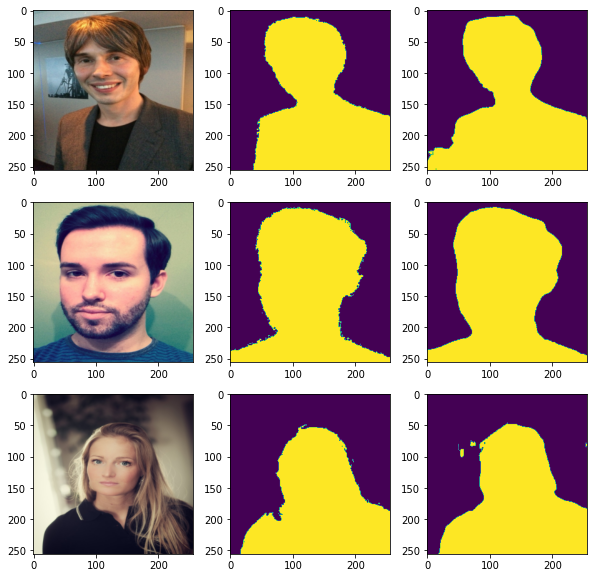

In [72]:
image, mask = next(iter(test_dl))
pred_mask = my_model(image)

plt.figure(figsize=(10, 10))
for i in range(num):
    plt.subplot(num, 3, i*num+1)
    plt.imshow(image[i].permute(1,2,0).cpu().numpy())
    plt.subplot(num, 3, i*num+2)
    plt.imshow(mask[i].cpu().numpy())
    plt.subplot(num, 3, i*num+3)
    plt.imshow(torch.argmax(pred_mask[i].permute(1,2,0), axis=-1).detach().numpy())

# 在train数据上测试

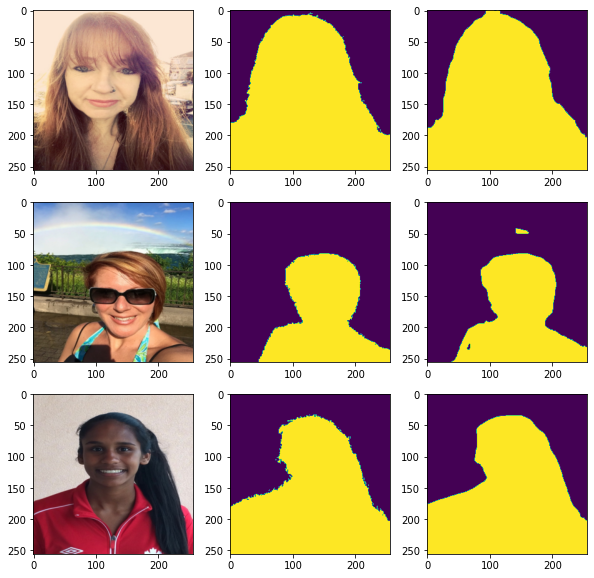

In [73]:
image, mask = next(iter(train_dl))
pred_mask = my_model(image)

plt.figure(figsize=(10, 10))
for i in range(num):
    plt.subplot(num, 3, i*num+1)
    plt.imshow(image[i].permute(1,2,0).cpu().numpy())
    plt.subplot(num, 3, i*num+2)
    plt.imshow(mask[i].cpu().numpy())
    plt.subplot(num, 3, i*num+3)
    plt.imshow(torch.argmax(pred_mask[i].permute(1,2,0), axis=-1).detach().numpy())